**Predicting Newsletter Subscription from Player Characteristics**
By: Clinton Wong

**Introduction**

A research group at UBC is studying how people interact with a Minecraft server in order to understand gaming behavior. One goal of the project is to better allocate resources and improve engagement by identifying which players are likely to subscribe to a newsletter. Understanding which traits make someone more likely to subscribe can help guide recruitment and outreach efforts.

**The primary question for this project:**

*Can Minecraft experience level, time spent playing, and age be used to predict if a player in the `players.csv` dataset will subscribe to a newsletter?*

This is a **classification problem** where the response variable is `subscribe`, and the predictor variables are `experience`, `gender`, `played_hours`, and `age`.
___
**Data Description**

This project uses data found in `players.csv`, a dataset from a real Minecraft usage study led by Frank Wood.

This dataset includes:
- Observations: 196 players
- Variables: 4 predictors + 1 response
- Target variable: `subscribe` (TRUE/FALSE)
- No missing values after filtering

**Variables Used in This Project**

`subscribe`
- Type: Logical (TRUE/FALSE)
- Indicates whether a player subscribed to the newsletter
- This is the response variable

`experience`
- Type: Categorical (e.g., Beginner, Regular, Veteran, Pro)
- Describes the player's self-reported experience level with Minecraft

`gender`
- Type: Categorical
- Player's self-reported gender identity

`played_hours`
- Type: Numeric
- Total number of hours the player spent on the server

`age`
- Type: Numeric
- The player’s age in years

___

**Methods and Results**

The K-Nearest Neighbors (KNN) classifier was used to predict if players subcribe to a newsletter, based on their experience level, gender, played hours, and age. This method is appropriate because it is predicts categorical outcomes based on similarity. It compares the players in question to others who are similar in terms of the predictor variables, and sees if those similar players subcribed or not.

To begin, the necessary libraries were loaded.

In [1]:
library(tidyverse)
library(tidymodels)
library(readr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The dataset `players.csv` was loaded, and `NA` variables were removed.

In [2]:
players <- read_csv("players.csv") |>
    drop_na(Age)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


We used `mutate()` to change `subscribe`, `experience`, and `gender` into factors. This is important because classification models need to treat these variables as labels.

In [3]:
players_simple <- players |>
    select(subscribe, experience, gender, played_hours, Age) |>
    mutate(
        subscribe = as_factor(subscribe),
        experience = as_factor(experience),
        gender = as_factor(gender))
players_simple

subscribe,experience,gender,played_hours,Age
<fct>,<fct>,<fct>,<dbl>,<dbl>
TRUE,Pro,Male,30.3,9
TRUE,Veteran,Male,3.8,17
FALSE,Veteran,Male,0.0,17
⋮,⋮,⋮,⋮,⋮
FALSE,Veteran,Male,0.3,22
FALSE,Amateur,Prefer not to say,0.0,17
FALSE,Amateur,Male,2.3,17


We then visualized the dataset in three different plots, examining each predictor variable and their relationships with subscription to understand potential patterns.

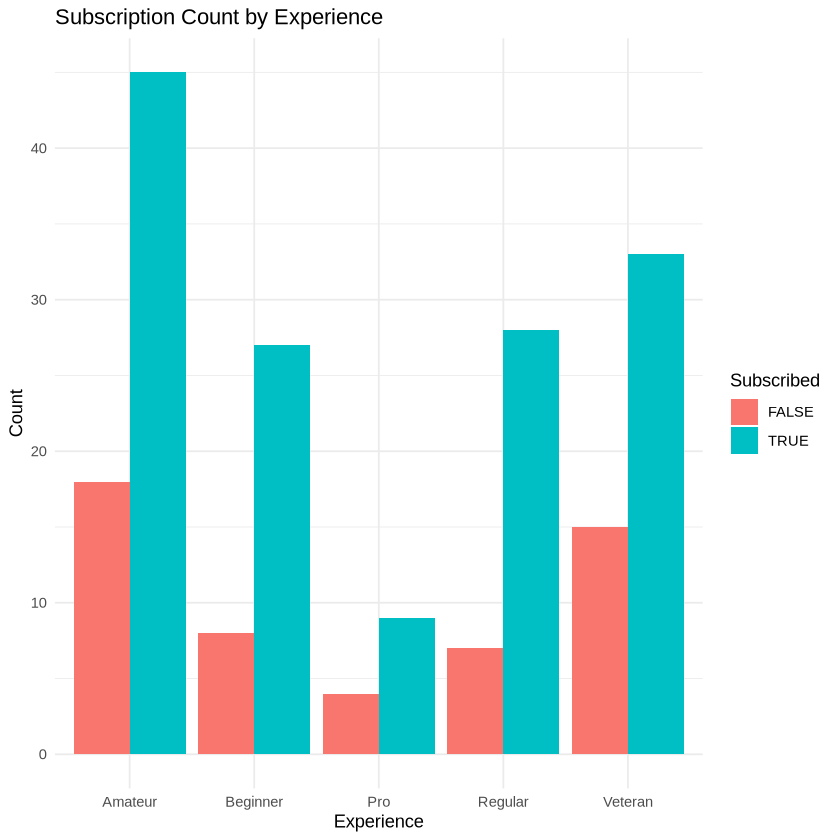

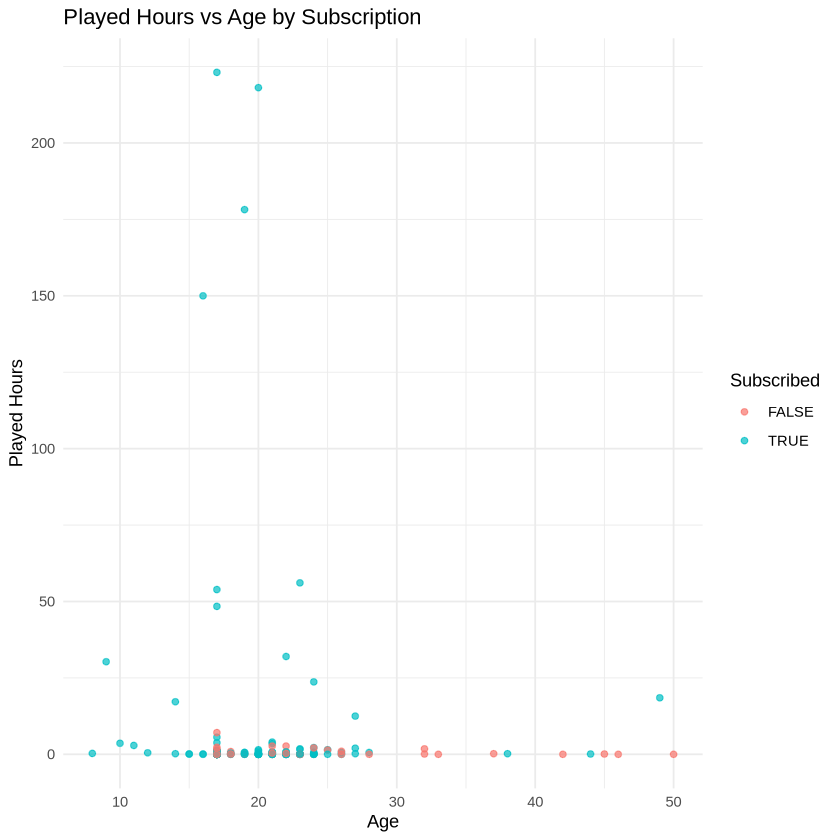

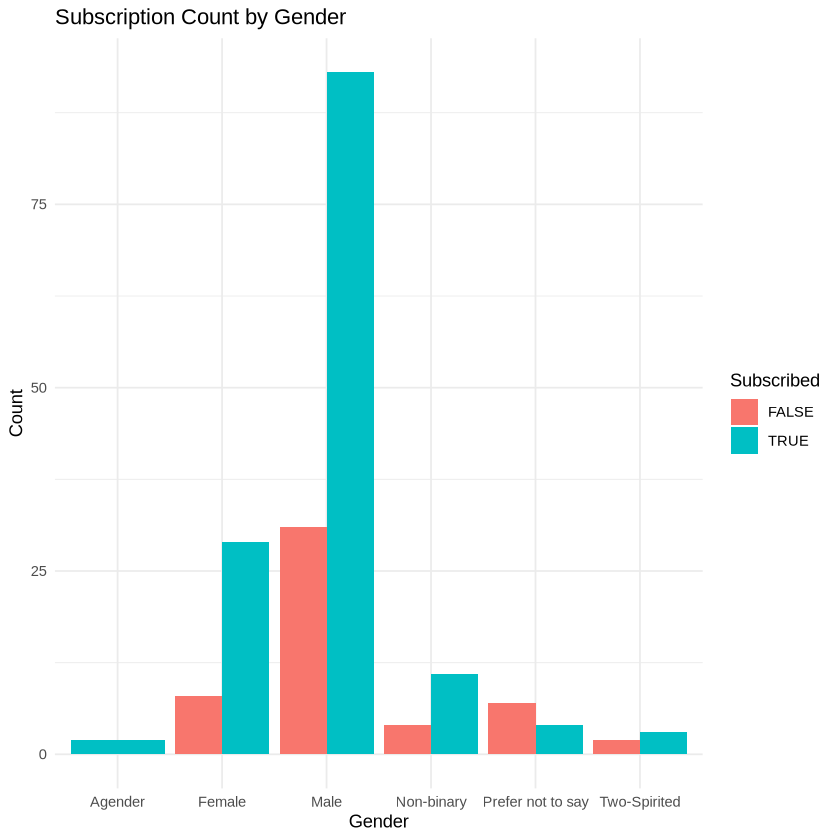

In [4]:
# Bar Plot: Experience Level by Subscription
ggplot(players, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(title = "Subscription Count by Experience", x = "Experience", y = "Count", fill = "Subscribed") +
    theme_minimal()

# Scatterplot: Age vs Played Hours, colored by Subscription
ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.7) +
    labs(title = "Played Hours vs Age by Subscription", x = "Age", y = "Played Hours", color = "Subscribed") +
    theme_minimal()

# Bar Plot: Gender by Subscription
ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Count by Gender", x = "Gender", y = "Count", fill = "Subscribed") +
  theme_minimal()

The proportion of subscribers vs non-subscribers was found for each experience level and gender, to show a more accurate comparison between each category.

In [5]:
options(repr.matrix.max.rows = 11)

prop_experience <- players |>
    count(experience, subscribe) |>
    group_by(experience) |>
    mutate(prop = n / sum(n))
prop_experience

prop_gender <- players |>
    count(gender, subscribe) |>
    group_by(gender) |>
    mutate(prop = n / sum(n))
prop_gender

experience,subscribe,n,prop
<chr>,<lgl>,<int>,<dbl>
Amateur,FALSE,18,0.2857143
Amateur,TRUE,45,0.7142857
Beginner,FALSE,8,0.2285714
Beginner,TRUE,27,0.7714286
Pro,FALSE,4,0.3076923
Pro,TRUE,9,0.6923077
Regular,FALSE,7,0.2000000
Regular,TRUE,28,0.8000000
Veteran,FALSE,15,0.3125000


gender,subscribe,n,prop
<chr>,<lgl>,<int>,<dbl>
Agender,TRUE,2,1.0000000
Female,FALSE,8,0.2162162
Female,TRUE,29,0.7837838
Male,FALSE,31,0.2500000
Male,TRUE,93,0.7500000
Non-binary,FALSE,4,0.2666667
Non-binary,TRUE,11,0.7333333
Prefer not to say,FALSE,7,0.6363636
Prefer not to say,TRUE,4,0.3636364


From the visualizations and proportion data, we can see that although amateurs had the most subscribers, it was actually regular players that were most likely to subscribe, as 80% of them did. The experience level that was least likely to subscribe were veterans, with only a ~68.8% chance of subscribing. Subscribers tended to play more than non-subscribers as well, and such players were around the ages of 17 - 20. All agender players subscribed, and females were the next most likely to subscribe, with a ~78.4% subscription rate. The only gender category to have more non-subscribers was "prefer not to say", where ~63.6% of players did not subscribe.

Next, we then split the data for training and testing in a 75/25 split, stratified by subscription.

In [6]:
set.seed(123)
data_split <- initial_split(players_simple, prop = 0.75, strata = subscribe)
train_data <- training(data_split)
test_data <- testing(data_split)

We build a recipe to tune to find the best number of neighbors (`k`), using cross-validation with 5 folds.

In [7]:
set.seed(123)
knn_vfold <- vfold_cv(train_data, v = 5, strata = subscribe)

knn_recipe <- recipe(subscribe ~ ., data = train_data) |>
    step_dummy(all_nominal_predictors()) |>
    step_normalize(all_numeric_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = knn_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_workflow |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean))

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7449425,5,0.025355446,Preprocessor1_Model02
21,accuracy,binary,0.7380460,5,0.006983172,Preprocessor1_Model05
11,accuracy,binary,0.7313957,5,0.021861070,Preprocessor1_Model03
26,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model06
31,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model07
36,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model08
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model18
91,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model19


The best performing value was `k = 6`, which gave the highest mean accuracy during cross-validation (~74.5%). This value was used to train the model.

In [8]:
set.seed(123)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
    set_engine("kknn") |>
    set_mode("classification")

players_recipe <- recipe(subscribe ~ ., data = train_data) |>
    step_dummy(all_nominal_predictors()) |>
    step_normalize(all_numeric_predictors())

players_workflow <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe) |>
    fit(data = train_data)
players_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(6,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2827586
Best kernel: rectangular
Best k: 6

The trained model was then used on the test set.

In [9]:
predictions <- predict(players_workflow, test_data) |>
  bind_cols(test_data)
predictions

.pred_class,subscribe,experience,gender,played_hours,Age
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,Veteran,Male,3.8,17
TRUE,FALSE,Veteran,Male,0.0,17
TRUE,TRUE,Amateur,Female,0.7,21
TRUE,FALSE,Amateur,Male,0.0,21
TRUE,TRUE,Pro,Male,0.0,17
TRUE,TRUE,Amateur,Female,48.4,17
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,TRUE,Amateur,Two-Spirited,0.4,17
TRUE,FALSE,Pro,Male,0.2,17


Finally, we evaluated how well the model performed by calculating accuracy, recall, and the confusion matrix by comparing its predictions to the actual labels in the test set.

In [10]:
conf_mat <- conf_mat(predictions, truth = subscribe, estimate = .pred_class)
print(conf_mat)

recall(predictions, truth = subscribe, estimate = .pred_class)

accuracy(predictions, truth = subscribe, estimate = .pred_class)

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


___

**Discussion**

In this project, we used K-Nearest Neighbors (KNN) classification to predict whether a Minecraft player would subscribe to a newletter based on their age, experience leve, gender, and hours played. Our final model achieved an accuracy of approximately 73%, which means that overall it predicted subscription status correctly. 

However, its recall was 0 for the `FALSE` class. The model did not correctly identify any non-subscribers, as confirmed in the confusion matrix. This occured because the model predicted that all players would subscribe. This may be due to imbalanced or patterns in the training data that favoured the `TRUE` class. 

This is surprising, as the predictor characteristics were expected to help distinguish between subscribers and non-subscribers. The visualizations suggested that veterans were least likely to subscribe, non-subscribers played less, and females were most likely to subscribe (excluding agender due to small sample size).

If used in practice, this model would overestimate the number of subscribers and could misguide recruitment or resource planning. 

For the future, efforts could be focused on several questions;
- would collecting more balanced data improve the model's ability to predict subscription?
- could other variables, such as in-game behaviour or time of play, help improve prediction?
- would a different classification method perform better in identifying non-subscribers?

Overall, this project shows how KNN classification methods can provide insight, but also show limitations in its ability to predict response variables. 